# <center> Package for Moist Static Energy Analysis on PyPI (Sept, 2018)
## <center> Author: Wei-Ming Tsai
## <center> RSMAS, University of Miami 


A package built for the MSE analysis of sounding data/ model output which provides required vertical profiles of thermodynamic parameters. 

1. Required paramters: Air temperature, Dewpoint, Pressure, Altitude [optional]. NOT specifically for sounding data! 


2. All calculations included depend on the [metpy.calc.thermo module.](https://unidata.github.io/MetPy/latest/_modules/metpy/calc/thermo.html)
   

3. Plotting options: thermo.plots, theta.plots, and mesd_plots.

In [1]:
from MSEplots import plots as mpt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
# reading data prociding vertical profiles of T, Td, pressure and height
date = datetime(2013, 8, 15, 0)
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values 
Temp = df['temperature'].values 
Temp_dew = df['dewpoint'].values 
altitude = df['height'].values 

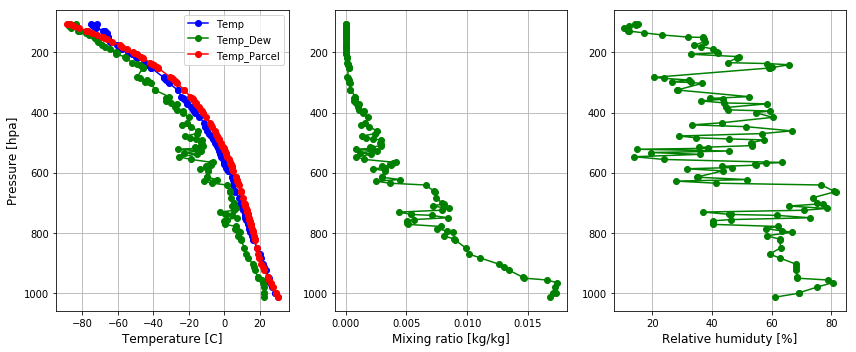

In [3]:
from metpy.calc.thermo import *
from metpy.units import units
q = mixing_ratio(saturation_vapor_pressure(Temp_dew*units.degC),pressure*units.mbar)
mpt.thermo_plots(pressure,Temp,q)

q = specific_humidity_from_mixing_ratio(q)

<module 'matplotlib.pyplot' from '/Users/willytsai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

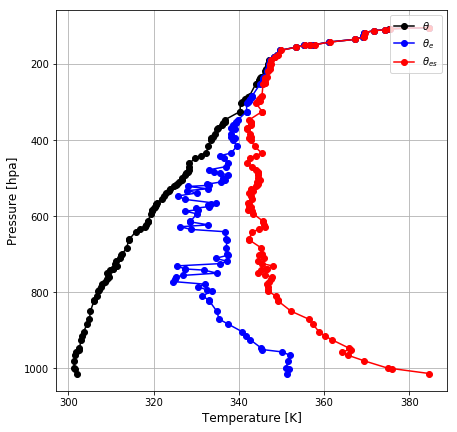

In [4]:
mpt.theta_plots(pressure,Temp,q)

<module 'matplotlib.pyplot' from '/Users/willytsai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

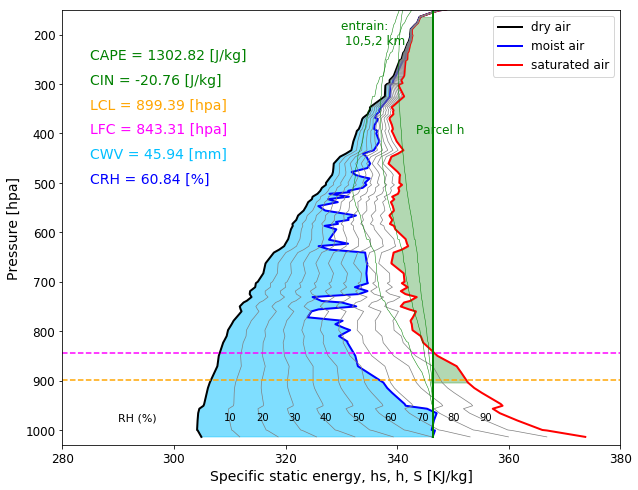

In [5]:
mpt.msed_plots(pressure,Temp,q,altitude) # altitude included

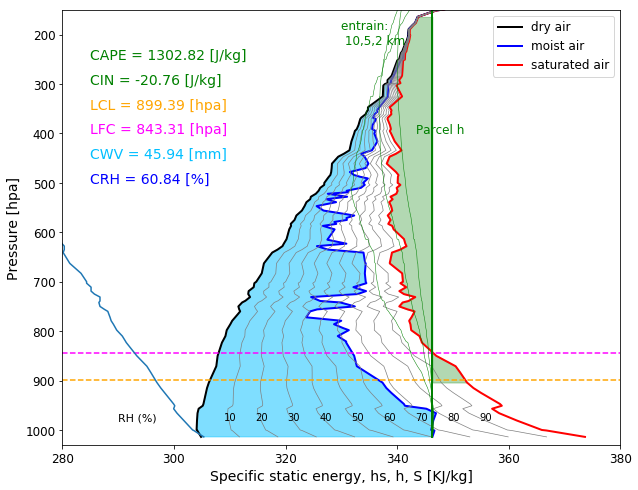

In [8]:
S=mpt.msed_plots(pressure,Temp,q,altitude=None) # altitude based on the hypsometric eq.
S.plot(Temp+2+273.15,pressure) # adding lines on the current figure 